Importing necessary libraries

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
%matplotlib inline

Reading the data

In [ ]:
df = pd.read_csv("/content/interpolated_data.csv")

# Augmented Dickey Fuller(ADF) Test
If the p-value is very less than the significance level of 0.05 then we can reject the null hypothesis and take that the series is stationary.

In [ ]:
# ADF Test for Ozone concentration

series = df.loc[:, 'OZONE_CONCENTRATION'].values
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.245852362814885
n_lags: 5.55694991605232e-13
p-value: 5.55694991605232e-13
Critial Values:
   1%, -3.4313541256158335
Critial Values:
   5%, -2.8619837376559043
Critial Values:
   10%, -2.567006198182481


In [ ]:
# ADF Test for PM2.5 concentration

series = df.loc[:, 'PM2.5_CONCENTRATION'].values
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.595110609171066
n_lags: 7.112273545042789e-14
p-value: 7.112273545042789e-14
Critial Values:
   1%, -3.431355979263189
Critial Values:
   5%, -2.8619845566709112
Critial Values:
   10%, -2.567006634161846


In [ ]:
# ADF Test for OZONE AQI

series = df.loc[:, 'OZONE_AQI'].values
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.323007192751557
n_lags: 3.5309682134926226e-13
p-value: 3.5309682134926226e-13
Critial Values:
   1%, -3.431353971453525
Critial Values:
   5%, -2.8619836695408516
Critial Values:
   10%, -2.5670061619233726


In [ ]:
# ADF Test for PM2.5 AQI

series = df.loc[:, 'PM2.5_AQI'].values
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -8.091249597514151
n_lags: 1.376374442469014e-12
p-value: 1.376374442469014e-12
Critial Values:
   1%, -3.4313541256158335
Critial Values:
   5%, -2.8619837376559043
Critial Values:
   10%, -2.567006198182481


For all the relevant series, we see that the p-value is way smaller than 0.05 so we can say that the our dataset is stationary with the ADF test

# Auto-Correlation Tests

We use series.autocorr which gives us the Pearson Correlation Coefficient

In [ ]:
# Autocorrelation for ozone concentration
series = df['OZONE_CONCENTRATION']
shift_1 = series.autocorr(lag=1)
print(shift_1)

0.9586350529911939


In [ ]:
# Autocorrelation for ozone AQI
series = df['OZONE_AQI']
shift_1 = series.autocorr(lag=1)
print(shift_1)

0.9562202272052218


In [ ]:
# Autocorrelation for PM2.5 concentration
series = df['PM2.5_AQI']
shift_1 = series.autocorr(lag=1)
print(shift_1)

0.9895200206971789


In [ ]:
# Autocorrelation for PM2.5 concentration

series = df['PM2.5_CONCENTRATION']
shift_1 = series.autocorr(lag=1)
print(shift_1)

0.9928835640904009


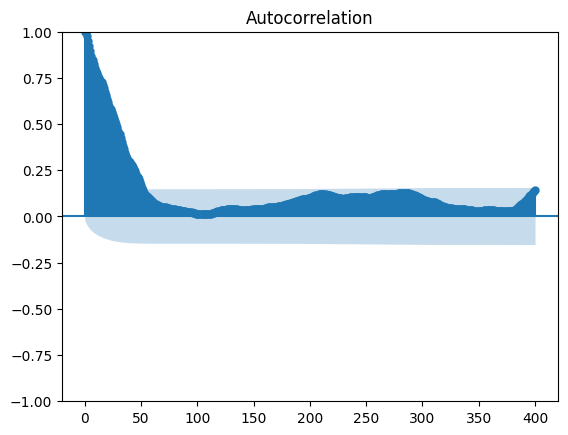

In [ ]:
# Plotting Autocorrelation for PM2.5 concentration

plot_acf(df['PM2.5_CONCENTRATION'], lags=400)
plt.show()

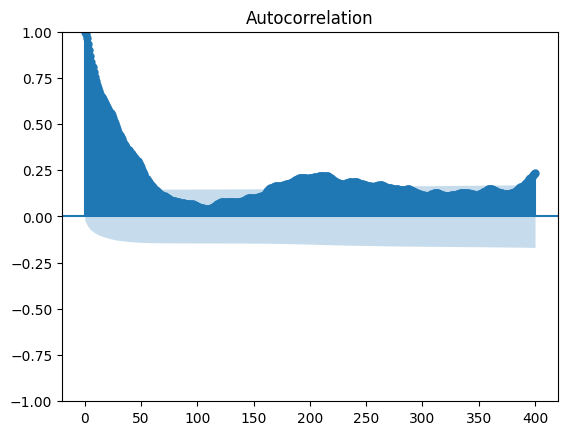

In [ ]:
# Plotting Autocorrelation for PM2.5 AQI


plot_acf(df['PM2.5_AQI'], lags=400)
plt.show()

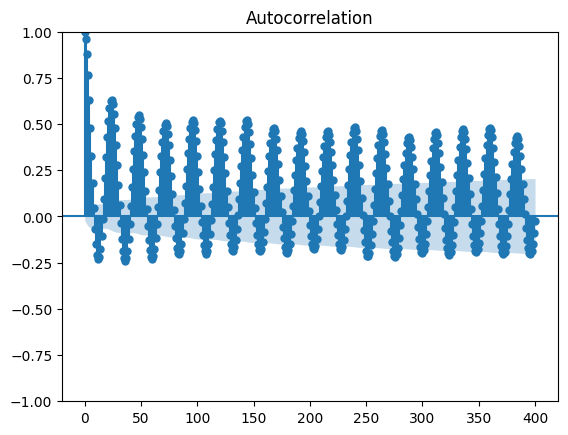

In [ ]:
# Plotting Autocorrelation for Ozone concentration

plot_acf(df['OZONE_CONCENTRATION'], lags=400)
plt.show()

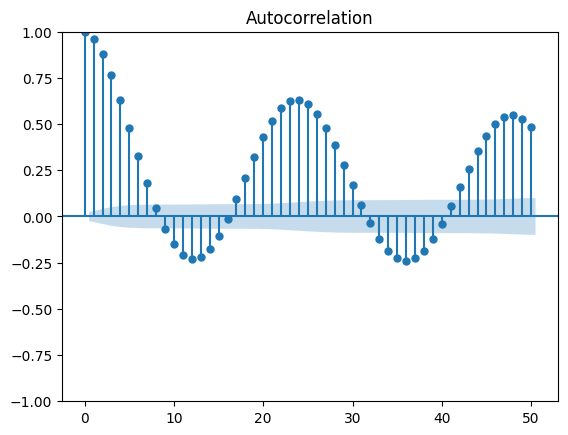

In [ ]:
# Trying to understand seasonality in ozone concentration

plot_acf(df['OZONE_CONCENTRATION'], lags=50)
plt.show()

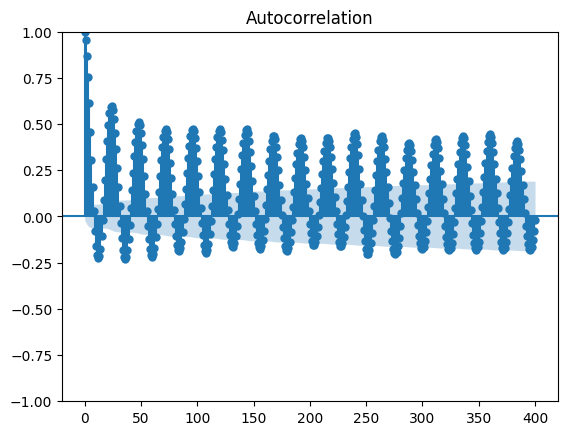

In [ ]:
# Plotting Autocorrelation for Ozone AQI

plot_acf(df['OZONE_AQI'], lags=400)
plt.show()

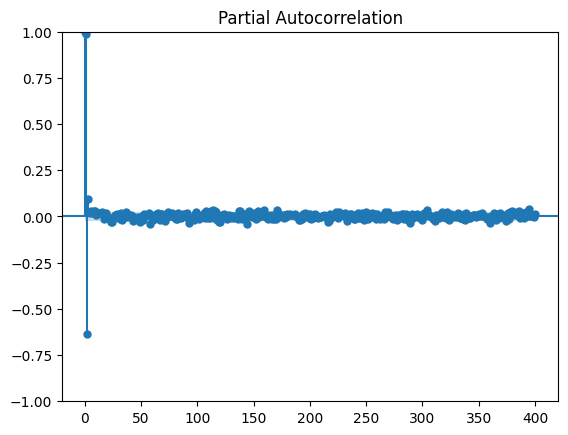

In [ ]:
# Plotting Partial Autocorrelation for PM2.5 AQI

plot_pacf(df['PM2.5_AQI'], lags=400)
plt.show()

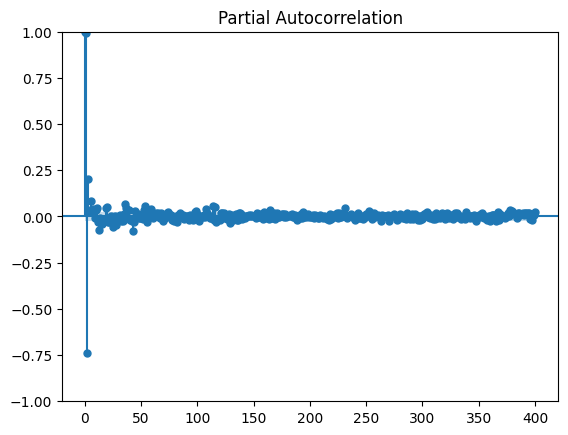

In [ ]:
# Plotting Partial Autocorrelation for PM2.5 concentration

plot_pacf(df['PM2.5_CONCENTRATION'], lags=400)
plt.show()

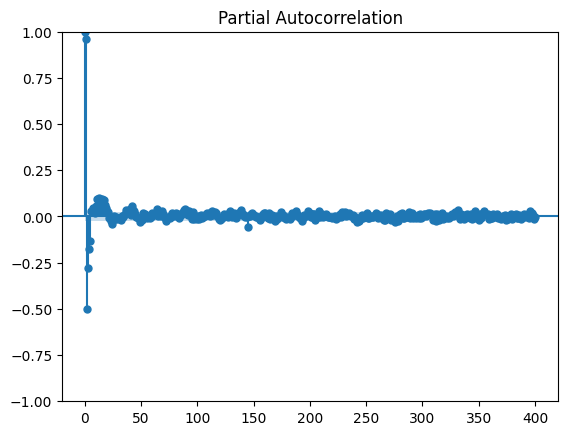

In [ ]:
# Plotting Partial Autocorrelation for Ozone concentration

plot_pacf(df['OZONE_CONCENTRATION'], lags=400)
plt.show()

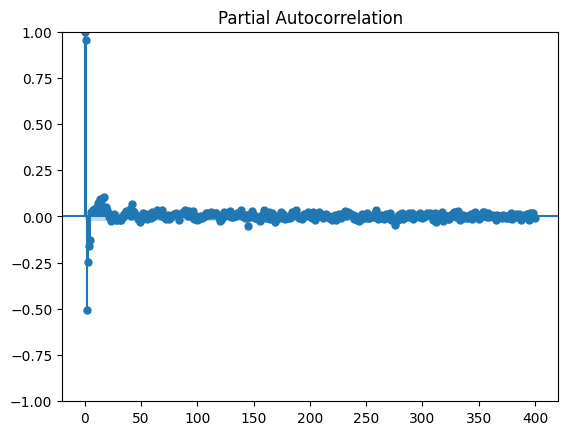

In [ ]:
# Plotting Partial Autocorrelation for Ozone AQI

plot_pacf(df['OZONE_AQI'], lags=400)
plt.show()

# Correlation of weather and pollutants features with AQI

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import tree
import seaborn as sns

In [ ]:
final= pd.read_csv("everything.csv")

In [ ]:
correlation_matrix = final[['pm10', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'PM2.5_AQI','Ozone_AQI','temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'wind_speed_10m']].corr()
print(correlation_matrix['PM2.5_AQI'])

pm10                    0.650520
carbon_monoxide         0.446533
nitrogen_dioxide        0.217110
sulphur_dioxide         0.273403
PM2.5_AQI               1.000000
Ozone_AQI               0.001760
temperature_2m          0.248442
relative_humidity_2m    0.032080
dew_point_2m            0.248877
wind_speed_10m         -0.291018
Name: PM2.5_AQI, dtype: float64


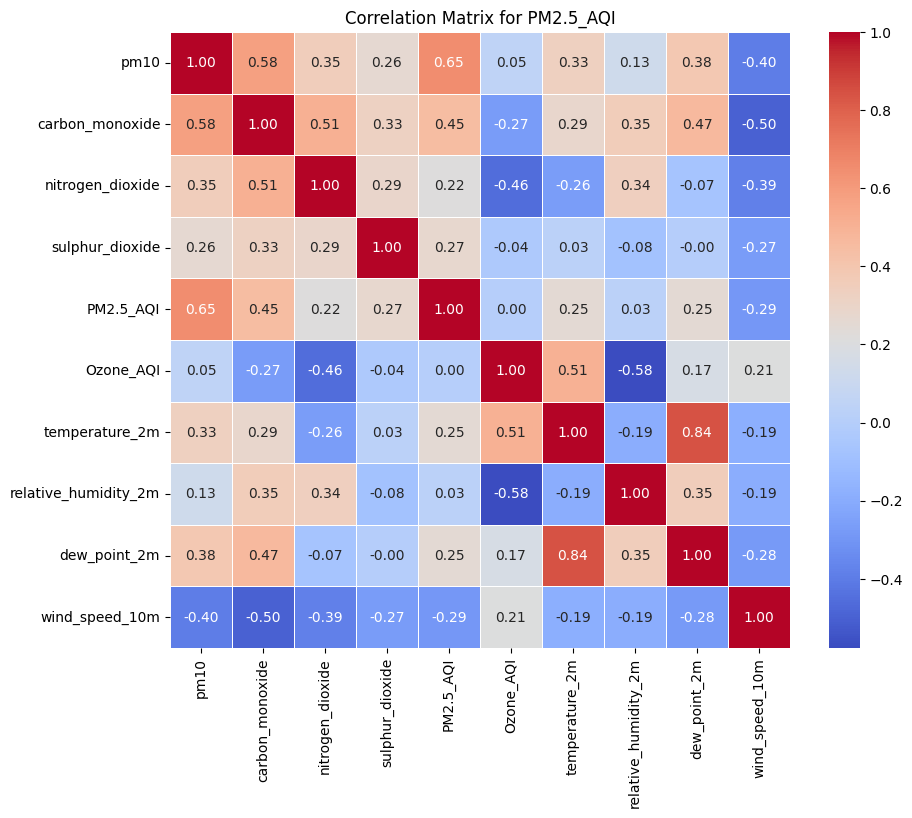

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for PM2.5_AQI')
plt.show()

In [ ]:
correlation_matrix = final[['pm10', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide', 'PM2.5_AQI','Ozone_AQI','temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'wind_speed_10m']].corr()
print(correlation_matrix['Ozone_AQI'])

pm10                    0.049508
carbon_monoxide        -0.272170
nitrogen_dioxide       -0.458358
sulphur_dioxide        -0.035112
PM2.5_AQI               0.001760
Ozone_AQI               1.000000
temperature_2m          0.505260
relative_humidity_2m   -0.577538
dew_point_2m            0.171340
wind_speed_10m          0.210263
Name: Ozone_AQI, dtype: float64


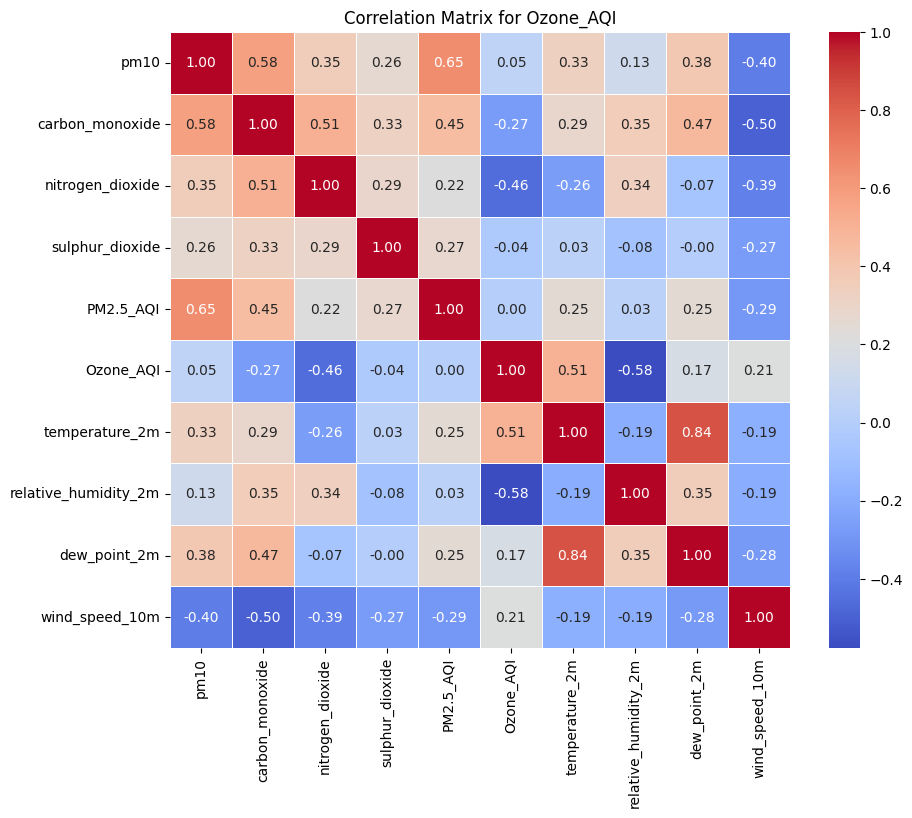

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Ozone_AQI')
plt.show()
